<a href="https://colab.research.google.com/github/sautiw/Numerical-Methods/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Part 6
Saurabh Tiwari

Salin Giri

Rahul Gauli


In [ ]:
import numpy as np
import scipy.linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline

Linear and nonlinear regression are famous machine learning models used to predict values given the relationship between different variables in a dataset. While both types of regression model the relationship between variables, linear regression fits a linear line to observe while nonlinear regression fits curves. Both the linear line and the curves can be attributed to certain equations that define them. These equations determine the type of line to be fitted within a data cluster. Nonlinear regression majorly deals with curves, i.e., lines generated from quadratic, polynomial, exponential, and cubic equations, while linear regression deals primarily with fitting straight lines in data clusters to make predictions. Regression relies on two distinctive variables, i.e., x and y values, that can be plotted on a graph. A line of best fit is further plotted against the data points to observe behavior. Regression relies on one dependent variable (y value been predicted) and one or more independent variables (x). When working with regression, it is essential to clean the dataset used. Correlation between the variables can also be calculated to aid in showing the relationship between chosen variables. The heatmap created significantly helps in establishing the connection between two or more variables. Nonlinear regression requires more analysis of data variables to determine their relationship. The variables determine the type of curve equation to be used. Python provides libraries like 'sklearn,' which is excellent for creating predictive linear and nonlinear models.


Lets use the data from online

In [ ]:
raw_data = pd.read_csv("/content/Marketing Raw Data.csv")
raw_data.head(n=6)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,9/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo
5,14/11/2020,46.0,34.0,11.0,11.0,2020.0,Saturday,1316.0,12996.0,1444.000,Promotion Blue


Check for any null values and display by column

In [ ]:
raw_data.isnull().sum()
raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/5/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/5/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/5/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean the dataset to remove null values

In [ ]:
data=raw_data.dropna()
data.tail(n=10)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
172,30/04/2021,18.0,59.0,4.0,16.0,2021.0,Friday,1836.0,16542.0,1916.700000,Promotion Blue
173,1/5/2021,18.0,59.0,5.0,17.0,2021.0,Saturday,1380.0,7445.0,805.636364,No Promo
174,2/5/2021,19.0,60.0,5.0,17.0,2021.0,Sunday,1423.0,12111.0,1513.875000,Promotion Red
175,3/5/2021,19.0,60.0,5.0,17.0,2021.0,Monday,1382.0,11273.0,1024.818182,Promotion Red
176,4/5/2021,19.0,60.0,5.0,17.0,2021.0,Tuesday,2152.0,3215.0,1533.888889,No Promo
177,5/5/2021,19.0,60.0,5.0,17.0,2021.0,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,6/5/2021,19.0,60.0,5.0,17.0,2021.0,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,7/5/2021,19.0,60.0,5.0,17.0,2021.0,Friday,2023.0,4587.0,1450.200000,No Promo
180,8/5/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875000,No Promo
181,9/5/2021,20.0,61.0,5.0,17.0,2021.0,Sunday,1303.0,3861.0,871.000000,No Promo


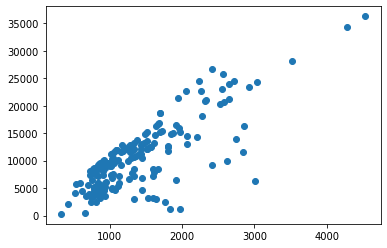

In [ ]:
plt.scatter(data["Marketing Spend"],data["Revenue"])

We can calculate the correlation between these two variables

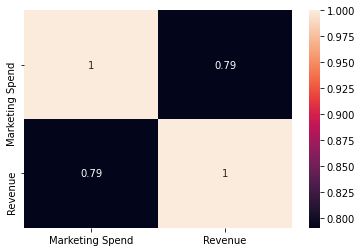

In [ ]:
corr_data = pd.get_dummies(data, columns=['Promo','Day_Name'])
d = corr_data[['Marketing Spend','Revenue']].corr()
graph = sns.heatmap(d, annot=True)

In [ ]:
b = stats.linregress(data["Marketing Spend"],data["Revenue"])[0]
a = stats.linregress(data["Marketing Spend"],data["Revenue"])[1]

In [ ]:
def func(x):
  y = a+b*x
  return y

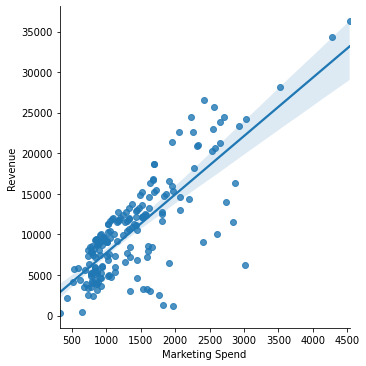

In [ ]:
graph=sns.lmplot(x= "Marketing Spend",y = "Revenue",data = data)

In [ ]:
def sumOfSquaredError(data):
    val = func(data["Visitors"])
    return np.sum((val - data["Revenue"]) ** 2.0)

sumOfSquaredError(data)

5503362737.324943

# Non-Linear Regression

Sample data columns with a nonlinear relationship

In [ ]:
xData = np.array([19.1647, 18.0189, 16.9550, 15.7683, 14.7044, 13.6269, 12.6040, 11.4309, 10.2987, 9.23465, 8.18440, 7.89789, 7.62498, 7.36571, 7.01106, 6.71094, 6.46548, 6.27436, 6.16543, 6.05569, 5.91904, 5.78247, 5.53661, 4.85425, 4.29468, 3.74888, 3.16206, 2.58882, 1.93371, 1.52426, 1.14211, 0.719035, 0.377708, 0.0226971, -0.223181, -0.537231, -0.878491, -1.27484, -1.45266, -1.57583, -1.61717])
yData = np.array([0.644557, 0.641059, 0.637555, 0.634059, 0.634135, 0.631825, 0.631899, 0.627209, 0.622516, 0.617818, 0.616103, 0.613736, 0.610175, 0.606613, 0.605445, 0.603676, 0.604887, 0.600127, 0.604909, 0.588207, 0.581056, 0.576292, 0.566761, 0.555472, 0.545367, 0.538842, 0.529336, 0.518635, 0.506747, 0.499018, 0.491885, 0.484754, 0.475230, 0.464514, 0.454387, 0.444861, 0.437128, 0.415076, 0.401363, 0.390034, 0.378698])


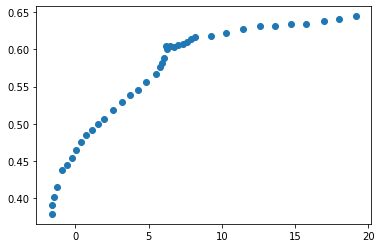

In [ ]:
plt.scatter(xData, yData)
plt.show()

Create an Augmented matrix to help is solving for values

In [ ]:
M = np.column_stack([np.ones(len(xData)),xData,xData**2])
print(M.shape)

(41, 3)


Use the scipy library to solve our matrix against corresponding values. The Gauss-Jordan fucntion written in previous parts can also be used.

In [ ]:
array = la.solve((M.T @ M),M.T @ yData)
array

array([ 0.45395542,  0.02748129, -0.00097756])

Finally, we graph our results and observe the outcome

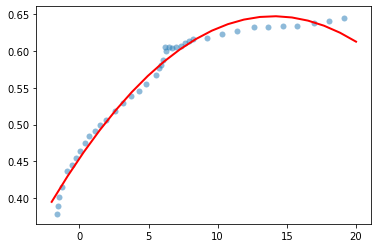

In [ ]:
xs = np.linspace(-2,20,20)
ys = array[0] + array[1]*xs + array[2]*xs**2
plt.plot(xs,ys,'r',linewidth=2)
plt.scatter(xData,yData,alpha=0.5,lw=0)
plt.show()

The dataset used for performing the linear regression provides two variables, i.e., "Marketing Spend" and "Revenue." The aim was to find the relationship between the amounts spent on the market and the revenue earned in return. This makes 'Revenue' our dependent variable and ‘Marketing Spend’ our independent variable. Performing an initial plot of these variables in a scatter chart shows the dispersion of data. As such, we are performing linear regression, which allows us to predict the revenue by drawing a line of best fit was necessary. Performing Linear regression thus shows the relationship between x and y values on the graph. Linear regression allows us to get a slope which is a crucial value determining how y (Revenue) changes with an increase in x (Marketing Spend). The intercept shows the value of y when x is equal to zero.

Regression calculates the distance that minimizes the distance between the fitted line and all the data points present in the plot. By doing so, the line of best fit describes the ideal position of variables that accurately describe the behavior of dependent variables. Since the model fit shows the difference between the predicted values and the observed values, they predict values y can take under certain circumstances.  The fit of our linear regression maps out the majority of the points of the graph. The difference in predicted values and observed values is thus not significant. The line of fit exhibits a logarithmic relationship between the x and y data variables. The “NumPy” and “sklearn” library tools were instrumental in plotting the model fit curve. Proper presentation data requires adequate analysis of variable data relationships through correlations. The ‘scipy’ library was also instrumental in creating and solving the temporary matrix created to solve linear systems of equations.


	